In [143]:
from __future__ import print_function

In [144]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
% matplotlib inline

In [145]:
nasa_u1v19 = pd.read_csv('data/nasa_u1_v19.csv')
nasa_u1v19 = np.array(nasa_u1v19.x)
# standardize
nasa_u1v19 = (nasa_u1v19 - np.mean(nasa_u1v19))/np.std(nasa_u1v19)

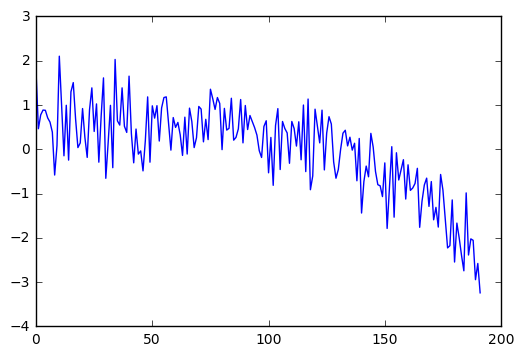

In [146]:
plt.plot(nasa_u1v19)

192
192


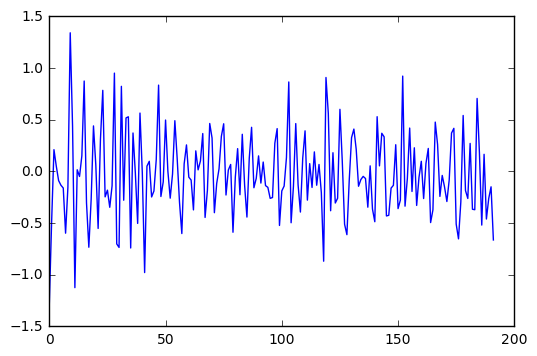

In [147]:
x = nasa_u1v19
dt = 1
dx = np.gradient(x,dt)
t = np.arange(1,len(x)+1,1)
print(len(t))
print(len(dx))
plt.plot(dx)

In [148]:
import numpy as np
import ffx

def run_ffx(train_X, train_y, test_X, test_y, varnames):
    models = ffx.run(train_X, train_y, test_X, test_y, varnames)
    base = [model.numBases() for model in models]
    test_error = [model.test_nmse for model in models]
    train_error = [ffx.core.nmse(model.simulate(train_X), train_y, min(train_y), max(train_y)) 
                   for model in models]
    for model,test_err,train_err in zip(models,test_error,train_error):
        print(model,"  ",model.numBases(),"  ",test_err,"   ",train_err)
        
    return ([base, test_error], [base, train_error], models)

In [149]:
train_x = t.reshape(len(t),1)
test_x = t.reshape(len(t),1)
train_y = x
test_y = x
varnames = 't'
models = run_ffx(train_x, train_y, test_x, test_y, varnames)

/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]


1.38e-13    0    0.1871373517383497     0.1871373517383497
0.853 - 6.89e-5*t^2    1    0.11488515903192917     0.11488515903192917
0.530 + 0.00950*t - 0.000117*t^2    2    0.10889225396704647     0.10889225396704647
1.44 - 1.26*log10(t) + 0.0368*t - 0.000214*t^2    3    0.10425912033544134     0.10425912033544134
0.578 - 0.00799*max(0,t-90.1) - 0.000522*max(0,t-141) * max(0,t-167) - 0.000159*max(0,t-116) * max(0,t-90.1) - 1.07e-5*t^2    4    0.10333171495598101     0.10333171495598101
0.547 - 0.0112*max(0,t-90.1) + 0.00296*max(0,39.2-t) - 0.000636*max(0,t-141) * max(0,t-167) - 0.000147*max(0,t-116) * max(0,t-90.1) - 2.60e-6*t^2    5    0.1028663143562236     0.1028663143562236
0.778 - 0.140*log10(t) - 0.00492*max(0,t-90.1) - 0.00254*max(0,t-90.1) * log10(t) - 0.000754*max(0,t-116) * log10(t) - 0.000419*max(0,t-116) * max(0,t-167) - 0.000132*max(0,t-90.1) * max(0,t-116)    6    0.10277563943291856     0.10277563943291856


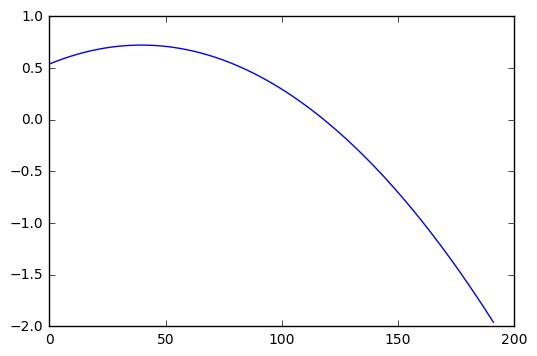

In [152]:
y = 0.530 + 0.00950*t - 0.000117*np.power(t,2)
plt.plot(y)

/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]
/home/happyling/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


-0.0311    0    0.1552191694766436     0.1552191694766436
0.00897 - 0.0511*abs(x)    1    0.15429242037965424     0.15429242037965424
-0.00301 - 0.0910*max(0,-0.747-x) - 0.0320*max(0,x+0.0349)    2    0.15411039643957147     0.15411039643957147
0.00535 / (1.0 - 1.47*abs(x) + 0.246*x^2 + 0.173*x^2 + 0.0178*x * abs(x))    4    0.15334378018671938     0.15334378018671938
(0.00720 + 0.000547*x * abs(x)) / (1.0 - 1.62*abs(x) + 0.344*x^2 + 0.182*x^2 + 0.121*x * abs(x) - 0.0951*x - 0.0509*x)    7    0.1507372628262943     0.1507372628262943


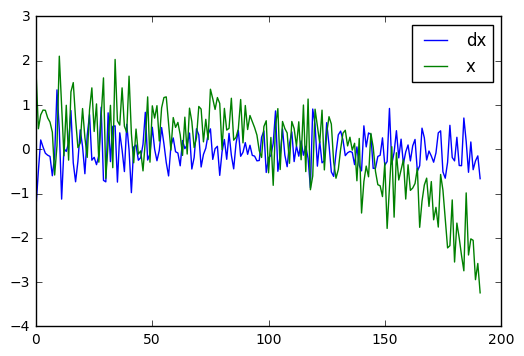

In [165]:
x = nasa_u1v19
dt = 1
dx = np.gradient(x,dt)
t = np.arange(1,len(x)+1,1)
plt.plot(dx,label='dx')
plt.plot(x,label='x')
plt.legend()
train_x = x.reshape(len(x),1)
test_x = x.reshape(len(x),1)
train_y = dx
test_y = dx
varnames = 'x'
models = run_ffx(train_x, train_y, test_x, test_y, varnames)

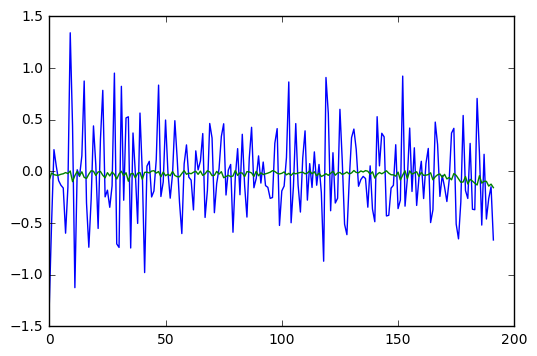

In [166]:
pre_dx = 0.00897 - 0.0511*abs(x)
plt.plot(dx)
plt.plot(pre_dx)

In [167]:
def pre_func(x,t):
    return -0.00304 / (1.0 + 0.154*x + 0.153*x) 
x0 = np.median(x)
pre_result = odeint(pre_func,x0,t)

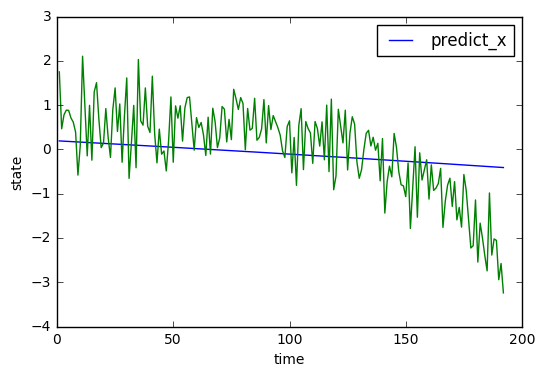

In [168]:
plt.plot(t,pre_result[:,0],label='predict_x')
plt.plot(t,x)
plt.legend()
plt.xlabel('time')
plt.ylabel('state')

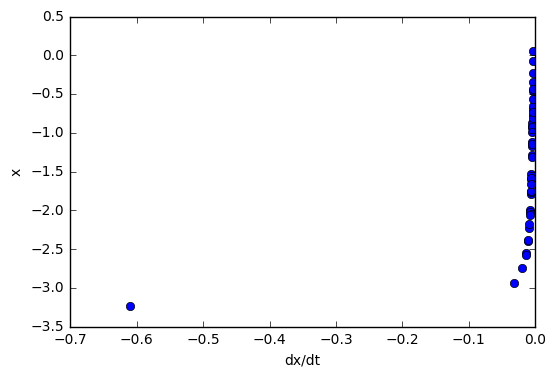

In [141]:
plt.plot((-0.00304 / (1.0 + 0.154*x + 0.153*x) ),x,'o')
#plt.plot(0.00897 - 0.0511*abs(x),np.zeros(len(x)),'k--')
plt.xlabel('dx/dt')
plt.ylabel('x')